# Refresher Exercises - Python Analytical Stack (Numpys, Pandas)_2
source: https://github.com/guiwitz/NumpyPandas_course

## Pandas basics
Exands based functionality of numpys to allow more robust operations.
Equivalient to R loaded with packages such as data.table, tidyr,et al.

In [1]:
# first we load the necessary packages and data
import numpy as np
import pandas as pd
import seaborn as sns

## Importing data
This can be done from a local source or directly from a URL

In [2]:
# local import
projects = pd.read_csv('Data/P3_GrantExport.csv',sep = ';')

In [ ]:
# import from url
#projects = pd.read_csv('http://p3.snf.ch/P3Export/P3_GrantExport.csv',sep = ';')

In [ ]:
# Note that the same pd.read_csv is valid for both sources (like R)

In [3]:
# And now for a brief look at the imported data using head (like R)
projects.head(5)

,Project Number,Project Number String,Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,Institution Country,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords
0,1,1000-000001,Schlussband (Bd. VI) der Jacob Burckhardt-Biog...,NaN,Kaegi Werner,Project funding (Div. I-III),Project funding,NaN,NaN,Unassignable - NA,10302,Swiss history,Humanities and Social Sciences;Theology & reli...,10302,01.10.1975,30.09.1976,11619.00,NaN
1,4,1000-000004,Batterie de tests à l'usage des enseignants po...,NaN,Massarenti Léonard,Project funding (Div. I-III),Project funding,Faculté de Psychologie et des Sciences de l'Ed...,Switzerland,University of Geneva - GE,10104,Educational science and Pedagogy,"Humanities and Social Sciences;Psychology, edu...",10104,01.10.1975,30.09.1976,41022.00,NaN
2,5,1000-000005,Kritische Erstausgabe der 'Evidentiae contra D...,NaN,Kommission für das Corpus philosophorum medii ...,Project funding (Div. I-III),Project funding,Kommission für das Corpus philosophorum medii ...,Switzerland,"Non-profit organisations (libraries, museums, ...",10101,Philosophy,Humanities and Social Sciences;Linguistics and...,10101,01.03.1976,28.02.1985,79732.00,NaN
3,6,1000-000006,Katalog der datierten Handschriften in der Sch...,NaN,Burckhardt Max,Project funding (Div. I-III),Project funding,Abteilung Handschriften und Alte Drucke Univer...,Switzerland,University of Basel - BS,10302,Swiss history,Humanities and Social Sciences;Theology & reli...,10302,01.10.1975,30.09.1976,52627.00,NaN
4,7,1000-000007,Wissenschaftliche Mitarbeit am Thesaurus Lingu...,NaN,Schweiz. Thesauruskommission,Project funding (Div. I-III),Project funding,Schweiz. Thesauruskommission,Switzerland,"Non-profit organisations (libraries, museums, ...",10303,Ancient history and Classical studies,Humanities and Social Sciences;Theology & reli...,10303,01.01.1976,30.04.1978,120042.00,NaN


## Exploring data
Pandas offers many of the same tools found in data.table and tidyR.
As with prior examples, in Python, this is done using object methods.

In [4]:
# For example, value counts are done using the value_counts() method
projects['University'].value_counts().head(10)

Institution abroad - IACH      13348
University of Zurich - ZH       8170
University of Geneva - GE       7385
ETH Zurich - ETHZ               7278
University of Berne - BE        6445
University of Basel - BS        5560
EPF Lausanne - EPFL             5174
University of Lausanne - LA     4944
Unassignable - NA               2642
University of Fribourg - FR     2535
Name: University, dtype: int64

<AxesSubplot:>

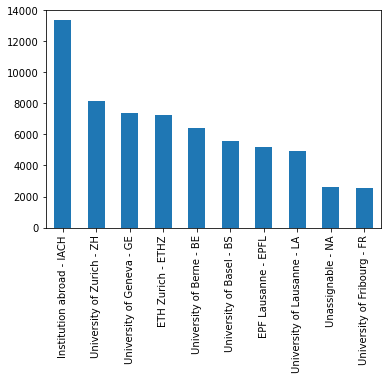

In [5]:
# This can be plotted using similar syntax. Note matplotlib is used.
projects['University'].value_counts().head(10).plot(kind='bar')

## Handling different data types
Unlike Numpy arrays, Pandas data.frames can have different data types.

In [ ]:
# For example, dates are presented in the data.
# However, they must first be converted from strings (ala R).
# Here, we extract data to a new column and then then the year.

In [7]:
# First, we create a new column and apply the to_datetime method to it
projects['start'] = pd.to_datetime(projects['Start Date'])
projects.loc[0].start

Timestamp('1975-01-10 00:00:00')

In [8]:
# Next, we create another column and extract the year
projects['year'] = projects.start.apply(lambda x: x.year)
projects.loc[0].start
projects.loc[0].year

1975.0

## Data wrangling, aggregation and statistics
Data wrangling is done in a fashion similar to R

In [9]:
# For example, first we convert Approved Amount to a numeric value.
# We do this, because it was loaded as text dt "NA" strings in some rows.
projects['Approved Amount'] = pd.to_numeric(projects['Approved Amount'])


ValueError: Unable to parse string "data not included in P3" at position 9210

In [ ]:
# However, we get an error for not coercing strings to numeric

In [11]:
# We fix that by adding "coerce" as the error parameter
projects['Approved Amount'] = pd.to_numeric(projects['Approved Amount'], errors = 'coerce')

In [16]:
# We then maybe wish to extract the fields from subfields hierarchy.
# This is to allow for cleaner tabulation tabulation and visualization.

In [17]:
# First, we specify the field names to be extracted and save.
science_types = ['Humanities', 'Mathematics','Biology']

In [18]:
# We then write a function that adds a label according to the match.
projects['Field'] = projects['Discipline Name Hierarchy'].apply(
    lambda el: next((y for y in [x for x in science_types if x in el] if y is not None),None) if not pd.isna(el) else el)

In [19]:
# We then group the data by the extracted fields and year
aggregated = projects.groupby(['Institution Country', 'year','Field'], as_index=False).mean()

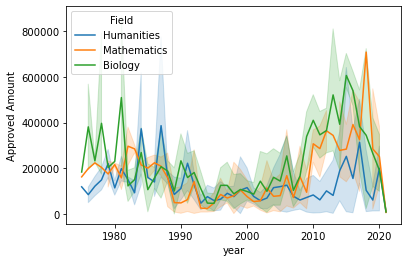

In [20]:
# Finally, we plot the means and variances (done via Seaborn library)
sns.lineplot(data = aggregated, x = 'year', y='Approved Amount', hue='Field');

In [ ]:
# Note that Seaborn adds all the labels and data (means/error) automat

In [ ]:
# In terms of analysis, we not a large increase after 2010.
# In order to understand this better, will look at funding targets.

In [21]:
# First, lets group by year and funding type and calculate the total:
grouped = projects.groupby(['year','Funding Instrument Hierarchy']).agg(
    total_sum=pd.NamedAgg(column='Approved Amount', aggfunc='sum')).reset_index()
grouped

,year,Funding Instrument Hierarchy,total_sum
0,1975.0,Project funding,32124534.0
1,1975.0,Science communication,44600.0
2,1976.0,Programmes;National Research Programmes (NRPs),268812.0
3,1976.0,Project funding,96620284.0
4,1976.0,Science communication,126939.0
...,...,...,...
378,2020.0,Programmes;r4d (Swiss Programme for Research o...,195910.0
379,2020.0,Project funding,193568294.0
380,2020.0,Project funding;Project funding (special),19239681.0
381,2020.0,Science communication,3451740.0


In [ ]:
# Now, for each year we keep only the 5 largest funding types and plot:

In [24]:
# First, we create the groups:
group_sorted = grouped.groupby('year',as_index=False).apply(lambda x: (x.groupby('Funding Instrument Hierarchy')
                                      .sum()
                                      .sort_values('total_sum', ascending=False))
                                     .head(5)).reset_index()

In [25]:
# Next, we filter years < 2000 for analytical clarity
instruments_by_year = group_sorted[(group_sorted.year > 2005) & (group_sorted.year < 2012)]

In [ ]:
# Now, we plot using matplotlib:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.barplot(data=instruments_by_year,
            x='year', y='total_sum', hue='Funding Instrument Hierarchy')

In [ ]:
# From this, we see that projecting funding has increased dramatically.

## Pandas structures
Pandas offers a variety of data structures & operations for large data
Here, we will focus on the two main structures: series and dataframes

### Series
Series are the Pandas version of 1D Numpy arrays

In [27]:
# Pandas structures are usually created from simply structures, eg:
# create Numpys arrays
numpy_array = np.array([4,8,38,1,6])
# now, convert to Pandas series using pd.Series()
pd_series = pd.Series(numpy_array)
pd_series

0     4
1     8
2    38
3     1
4     6
dtype: int64

In [28]:
# The underlying structure can be recovered with the .values attribute:
pd_series.values
    

array([ 4,  8, 38,  1,  6])

In [29]:
# Otherwise, indexing works identical to Numpy regular arrays
pd_series[1]

8

### Indexing
Similar to R, Pandas series can be assigned and accessed by name

In [31]:
# Here, we define and index for our Pandas series
pd_series2 = pd.Series(numpy_array, index=['a', 'b', 'c', 'd','e'])
pd_series2

a     4
b     8
c    38
d     1
e     6
dtype: int64

In [32]:
# Now, an element can be access via index:
pd_series2[1]

8

In [33]:
# Or, it can be access by its assigned namme:
pd_series2['b']

8

In [ ]:
# A more direct way to create named series is to transform a dictionary

In [34]:
# Here, we specify a dictionary array
composer_birth = {'Mahler': 1860, 'Beethoven': 1770, 'Puccini': 1858, 'Shostakovich': 1906}

In [35]:
# Then, we convert it to a series:
pd_composer_birth = pd.Series(composer_birth)
pd_composer_birth

Mahler          1860
Beethoven       1770
Puccini         1858
Shostakovich    1906
dtype: int64

In [36]:
# And as before, we can access it directly via its name
pd_composer_birth['Puccini']

1858

## Dataframes
In Pandas, dataframes are a collection of Series with a common index

In [37]:
# To create such a dataframe, lets first define a few more Series
composer_death = pd.Series({'Mahler': 1911, 'Beethoven': 1827, 'Puccini': 1924, 'Shostakovich': 1975})
composer_city_birth = pd.Series({'Mahler': 'Kaliste', 'Beethoven': 'Bonn', 'Puccini': 'Lucques', 'Shostakovich': 'Saint-Petersburg'})

In [ ]:
# Note that each Series has common data name-indices (composer name)

In [38]:
# Now, we combine into a single Dataframe and assing names for each
composers_df = pd.DataFrame({'birth': pd_composer_birth, 'death': composer_death, 'city': composer_city_birth})
composers_df

,birth,death,city
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg


In [ ]:
# Note that the pd.DataFrame syntax specifies a series of series

In [39]:
# A more common way of creating a dataframe is to directly specify
dict_of_list = {'birth': [1860, 1770, 1858, 1906], 'death':[1911, 1827, 1924, 1975], 
 'city':['Kaliste', 'Bonn', 'Lucques', 'Saint-Petersburg']}

In [40]:
# We then convert the dictionary of lists into a dataframe.
pd.DataFrame(dict_of_list)


,birth,death,city
0,1860,1911,Kaliste
1,1770,1827,Bonn
2,1858,1924,Lucques
3,1906,1975,Saint-Petersburg


In [ ]:
# However, note that composer names have yet to be added

In [41]:
# We can do this as was done before with series, via an list of names
pd.DataFrame(dict_of_list, index=['Mahler', 'Beethoven', 'Puccini', 'Shostakovich'])


,birth,death,city
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg


### Accessing values

In [42]:
# Unlike Series, a bracket gives access to a column (not an index), eg:
composers_df['city']

Mahler                   Kaliste
Beethoven                   Bonn
Puccini                  Lucques
Shostakovich    Saint-Petersburg
Name: city, dtype: object

In [43]:
# Alternatively, one can use the object-attributes syntax to access
composers_df.city

Mahler                   Kaliste
Beethoven                   Bonn
Puccini                  Lucques
Shostakovich    Saint-Petersburg
Name: city, dtype: object

In [ ]:
# Note: the attributes syntax has limitations wrt characters.
# So, its recommended to use the brackets notation by default.

In [44]:
# And when specifying multiple columns, a dataframe is returned.
composers_df[['city', 'birth']]

,city,birth
Mahler,Kaliste,1860
Beethoven,Bonn,1770
Puccini,Lucques,1858
Shostakovich,Saint-Petersburg,1906


In [ ]:
# One important difference wrt Numpys is indexing requires a method
# ...either .iloc[] (for the index) or the .loc[] (for the name)

In [46]:
# For example,,,
composers_df.iloc[0,1]

1911

In [47]:
# Or via the explicit index (name):
composers_df.loc['Mahler','death']

1911

In [ ]:
# Note: loc and ``ìloc``` use brackets [] and not parenthesis ().

In [48]:
# And numpys-style indexing works here too:
composers_df.iloc[1:3,:]

,birth,death,city
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques


In [49]:
# You can also retrieve a list of all the columns:
composers_df.keys()

Index(['birth', 'death', 'city'], dtype='object')

### Adding columns

In [51]:
# Columns can be added simply by create a default of dummy value:
composers_df['country'] = 'default'

In [52]:
# Or an existing list can be created and added direction to the df:
country = ['Austria','Germany','Italy','Russia']
composers_df['country2'] = country
composers_df

,birth,death,city,country,country2
Mahler,1860,1911,Kaliste,default,Austria
Beethoven,1770,1827,Bonn,default,Germany
Puccini,1858,1924,Lucques,default,Italy
Shostakovich,1906,1975,Saint-Petersburg,default,Russia


## Importing/export, basic plotting

### Importing data to Pandas
Another ways of creating dataframes is to import from CSV or Excel.

In [53]:
# Excel files can be read in using the read_excel function (ala R)
pd.read_excel('Data/composers.xlsx')


,composer,birth,death,city
0,Mahler,1860,1911,Kaliste
1,Beethoven,1770,1827,Bonn
2,Puccini,1858,1924,Lucques
3,Shostakovich,1906,1975,Saint-Petersburg


In [ ]:
# Note that read_excel automatically recognizes the excel headers
# However, numbered row indices were added automatically

In [56]:
# To specify row indices, we can make explicit the column to use:
specific_sheet = pd.read_excel('Data/composers.xlsx', index_col = 'composer')


In [57]:
specific_sheet

,birth,death,city
composer,,,
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg


In [ ]:
### Handling unknown values

In [ ]:
# In Pandas, NaN is recognized as missing
# If anything else is used, we need to be handle it explicitly

In [58]:
# First, let's do a regular import
import1 = pd.read_excel('Data/composers.xlsx', index_col = 'composer',sheet_name='Sheet2')
import1

,birth,death,city
composer,,,
Mahler,1860.0,1911,Kaliste
Beethoven,1770.0,1827,Bonn
Puccini,1858.0,1924,Lucques
Shostakovich,1906.0,1975,Saint-Petersburg
Sibelius,10.0,unknown,unknown
Haydn,NaN,NaN,Röhrau


In [ ]:
# We can look at the columns and note data types have been assigned

In [59]:
# For example...
import1.birth

composer
Mahler          1860.0
Beethoven       1770.0
Puccini         1858.0
Shostakovich    1906.0
Sibelius          10.0
Haydn              NaN
Name: birth, dtype: float64

In [60]:
# Or...
import1.death

composer
Mahler             1911
Beethoven          1827
Puccini            1924
Shostakovich       1975
Sibelius        unknown
Haydn               NaN
Name: death, dtype: object

In [ ]:
# Note that the death column has been imported as a string
# This is problematic from the perspective of conducting analyses

In [61]:
# For example, the describe function simply skips non-numerics:
import1.describe()

,birth
count,5.000000
mean,1480.800000
std,823.674207
min,10.000000
25%,1770.000000
50%,1858.000000
75%,1860.000000
max,1906.000000


In [ ]:
# Note that the death column is missing.

In [62]:
# Here, we specify that 'unknown' should be NaN (missing):
import2 = pd.read_excel('Data/composers.xlsx', index_col = 'composer',
                        sheet_name='Sheet2', na_values=['unknown'])
import2

,birth,death,city
composer,,,
Mahler,1860.0,1911.0,Kaliste
Beethoven,1770.0,1827.0,Bonn
Puccini,1858.0,1924.0,Lucques
Shostakovich,1906.0,1975.0,Saint-Petersburg
Sibelius,10.0,NaN,NaN
Haydn,NaN,NaN,Röhrau


In [63]:
# Now, computations using the death column are possible:
import2.describe()

,birth,death
count,5.000000,4.000000
mean,1480.800000,1909.250000
std,823.674207,61.396933
min,10.000000,1827.000000
25%,1770.000000,1890.000000
50%,1858.000000,1917.500000
75%,1860.000000,1936.750000
max,1906.000000,1975.000000


### Columns types
Column types can be specified using the dtype option and a dictionary.

In [ ]:
# For example, we know classified is an integer not a float

In [65]:
# And here, we can make all data types explicit on import:
import2 = pd.read_excel('Data/composers.xlsx', index_col = 'composer',sheet_name='Sheet1', na_values=['unknown'],
                       dtype={'composer':str,'birth':np.int32,'death':np.int32,'city':str})

In [66]:
# For example, lets check birth
import2.birth

composer
Mahler          1860
Beethoven       1770
Puccini         1858
Shostakovich    1906
Name: birth, dtype: int32

### Modifications after import
We can also do a default import and correct what needs to be after.

In [67]:
# To replace values, we can use the replace() function; for example:
import_nans = import1.replace('unknown', np.nan)
import_nans.birth

composer
Mahler          1860.0
Beethoven       1770.0
Puccini         1858.0
Shostakovich    1906.0
Sibelius          10.0
Haydn              NaN
Name: birth, dtype: float64

In [ ]:
# Note that when we replace the values, Pandas adjusts column the type

In [68]:
# For example,,,
import1.death.dtype

dtype('O')

In [69]:
# And...
import_nans.death.dtype

dtype('float64')

In [ ]:
# We can change also change column type using same syntax from Numpys

In [70]:
# For example,,,
import2.birth

composer
Mahler          1860
Beethoven       1770
Puccini         1858
Shostakovich    1906
Name: birth, dtype: int32

In [71]:
# And now...
import2.birth.astype('float')

composer
Mahler          1860.0
Beethoven       1770.0
Puccini         1858.0
Shostakovich    1906.0
Name: birth, dtype: float64

In [ ]:
# But if we look at import2 again, we note the type did not change
# For dataframes, changes are only effective if we reassign the column

In [72]:
# Reassignment is done using the same logic from R
import2.birth = import2.birth.astype('float')
import2.birth

composer
Mahler          1860.0
Beethoven       1770.0
Puccini         1858.0
Shostakovich    1906.0
Name: birth, dtype: float64

### Exporting

In [73]:
# To export a dataframe to csv, the following command is used:
import2.to_csv('mydataframe.csv')

In [ ]:
# lets confirms its been saved...

In [74]:
ls 'mydataframe.csv'

mydataframe.csv


In [78]:
# More complex data objects can be saved to a "pickle" format
# Pickle is a Panda native format that is better wrt nested lists, etc
import2.to_pickle('my_dataframe.pkl')

In [81]:
# And it can be releaded using the Pandas function pd.read_pickle()
import3 = pd.read_pickle('Data/my_dataframe.pkl')
import3

,birth,death,city
composer,,,
Mahler,1860.0,1911,Kaliste
Beethoven,1770.0,1827,Bonn
Puccini,1858.0,1924,Lucques
Shostakovich,1906.0,1975,Saint-Petersburg


### Plotting
Pandas improves the output of native plots by using the df information

In [82]:
# Lets explore via a simple dataset
composers = pd.read_excel('Data/composers.xlsx', sheet_name='Sheet5')


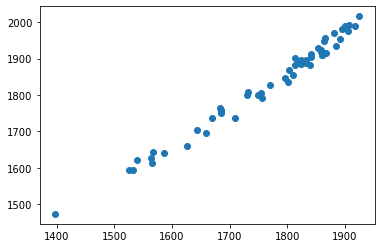

In [83]:
# Series can be used directly by Matplotlib; e.g. default scatter plot
plt.plot(composers.birth, composers.death, 'o')
plt.show()


In [ ]:
# Note that different plots can be specified using the "kind" option
# The variables to plot are column names rather than whole series

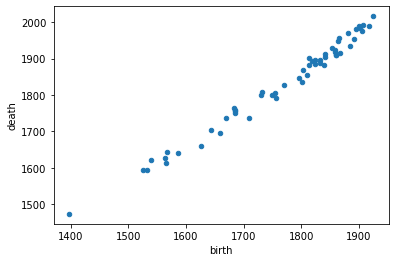

In [84]:
# For example...
composers.plot(x = 'birth', y = 'death', kind = 'scatter')
plt.show()

In [ ]:
# We note that the plot automatically gets axis labels

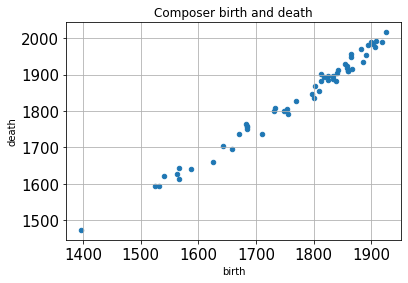

In [85]:
# We can also directly specify labels and axis titles
composers.plot(x = 'birth', y = 'death', kind = 'scatter',
               title = 'Composer birth and death', grid = True, fontsize = 15)
plt.show()

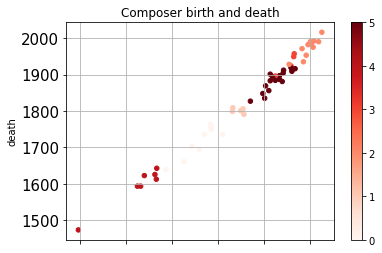

In [86]:
# We can also add additional formatting, for example:
composers.plot(x = 'birth', y = 'death',kind = 'scatter',
               c = composers.period.astype('category').cat.codes, colormap = 'Reds', title = 'Composer birth and death', grid = True, fontsize = 15)
plt.show()

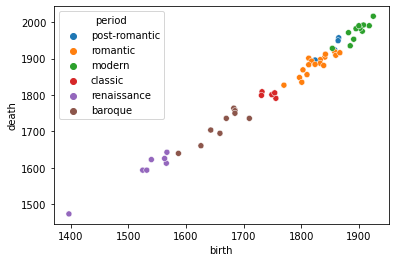

In [87]:
# Seaborn provides for a smoother plotting experience; for example:
sns.scatterplot(data = composers, x = 'birth', y = 'death', hue = 'period')
plt.show()

In [ ]:
# Some additional options are available in the plot module...

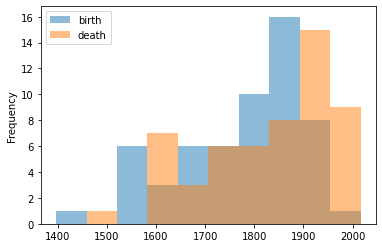

In [88]:
# For example, histograms...
composers.plot.hist(alpha = 0.5)
plt.show()

In [ ]:
# We can also use styles with plots; for example...

In [90]:
# First, specify style
plt.style.use('ggplot')

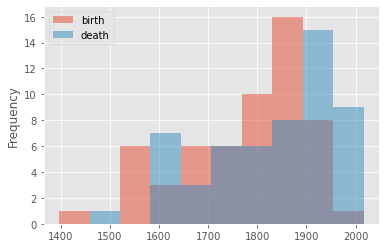

In [91]:
# Then...
composers.plot.hist(alpha = 0.5)
plt.show()

## Operations with Pandas objects
Here we practice analysis of tabular data using Pandas with Numpys

In [92]:
# First, load our libraries
import pandas as pd
import numpy as np

In [93]:
# Next, we load our data
compo_pd = pd.read_excel('Data/composers.xlsx')
compo_pd

,composer,birth,death,city
0,Mahler,1860,1911,Kaliste
1,Beethoven,1770,1827,Bonn
2,Puccini,1858,1924,Lucques
3,Shostakovich,1906,1975,Saint-Petersburg


In [95]:
# Now, mathematical operations work against entire columns as in R

In [96]:
# For example, multiplication
compo_pd['birth']*2

0    3720
1    3540
2    3716
3    3812
Name: birth, dtype: int64

In [97]:
# Or logarithms
np.log(compo_pd['birth'])

0    7.528332
1    7.478735
2    7.527256
3    7.552762
Name: birth, dtype: float64

In [98]:
# We can also apply operations to multiple columns
compo_pd[['birth','death']]*2


,birth,death
0,3720,3822
1,3540,3654
2,3716,3848
3,3812,3950


### Column operations
Summary functions are avialable, that work on entire dataframes

In [99]:
# For example, the mean
np.mean(compo_pd)

/usr/local/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3417: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


birth    1848.50
death    1909.25
dtype: float64

In [ ]:
# Or, standard deviation

In [100]:
compo_pd.std()

/var/folders/l9/zf8fhrds2nd_sfhd808zjdd80000gn/T/ipykernel_45801/237597691.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  compo_pd.std()


birth    56.836021
death    61.396933
dtype: float64

In [ ]:
# Note that these function complain about non-numerics

In [101]:
# A function to provide common discriptics is also available:
compo_pd.describe()

,birth,death
count,4.000000,4.000000
mean,1848.500000,1909.250000
std,56.836021,61.396933
min,1770.000000,1827.000000
25%,1836.000000,1890.000000
50%,1859.000000,1917.500000
75%,1871.500000,1936.750000
max,1906.000000,1975.000000


In [102]:
# We can also call summary stats directly from a single column
compo_pd.birth.mean()

1848.5

### Operations between Series
We can also do computations with multiple series, as with Numpy arrays

In [103]:
# For example, subtraction
compo_pd['death']-compo_pd['birth']

0    51
1    57
2    66
3    69
dtype: int64

In [ ]:
# We can also add results to new dataframe columns; for example

In [104]:
# Here, we create a derived age column:
compo_pd['age'] = compo_pd['death']-compo_pd['birth']
compo_pd

,composer,birth,death,city,age
0,Mahler,1860,1911,Kaliste,51
1,Beethoven,1770,1827,Bonn,57
2,Puccini,1858,1924,Lucques,66
3,Shostakovich,1906,1975,Saint-Petersburg,69


### Other functions
Pandas offers apply methods to apply custom functions to dataframes

In [ ]:
#For example, to define the the age >60 as 'old' and <60 as 'young'. 

In [105]:
# First, we create the function:
def define_age(x):
    if x>60:
        return 'old'
    else:
        return 'young'

In [106]:
# Here, we test it:
define_age(30)

'young'

In [107]:
# And again
define_age(70)

'old'

In [ ]:
# Good. Seems ok.

In [108]:
# We can now apply to an entire Series.
compo_pd.age.apply(define_age)

0    young
1    young
2      old
3      old
Name: age, dtype: object

In [109]:
# And again, we can directly add this output to a new column:
compo_pd['age_def'] = compo_pd.age.apply(define_age)
compo_pd

,composer,birth,death,city,age,age_def
0,Mahler,1860,1911,Kaliste,51,young
1,Beethoven,1770,1827,Bonn,57,young
2,Puccini,1858,1924,Lucques,66,old
3,Shostakovich,1906,1975,Saint-Petersburg,69,old


In [ ]:
# We can also apply a function to an entire DataFrame. 
# For example, how many composers have birth and death dates within the XIXth century:

In [110]:
# Here, we define the function:
def nineteen_century_count(x):
    return np.sum((x>=1800)&(x<1900))

In [111]:
# Then we execute...
compo_pd[['birth','death']].apply(nineteen_century_count)


birth    2
death    1
dtype: int64

In [ ]:
# The function is applied column-wise and returns a number for each

In [112]:
# Or, we can just directly return the boolean...
# define function
def nineteen_century_true(x):
    return (x>=1800)&(x<1900)
# execute
compo_pd[['birth','death']].apply(nineteen_century_true)

,birth,death
0,True,False
1,False,True
2,True,False
3,False,False


In [ ]:
# Like Numpys, dataframes can also be selected via logical indices

In [113]:
# So, if we use a logical comparison it yields a logical series
compo_pd['birth'] > 1859

0     True
1    False
2    False
3     True
Name: birth, dtype: bool

In [ ]:
# And we can use this series directly to index a dataframe (like R)

In [114]:
# First, we create the index
log_indexer = compo_pd['birth'] > 1859
log_indexer

0     True
1    False
2    False
3     True
Name: birth, dtype: bool

In [115]:
# Then we use in direclty in our data frame
compo_pd[log_indexer]

,composer,birth,death,city,age,age_def
0,Mahler,1860,1911,Kaliste,51,young
3,Shostakovich,1906,1975,Saint-Petersburg,69,old


In [ ]:
# And we can also create more complex logical indices

In [116]:
# First we test
(compo_pd['birth'] > 1859)&(compo_pd['age']>60)

0    False
1    False
2    False
3     True
dtype: bool

In [ ]:
# Note the parentheses...

In [117]:
# Now we use in our dataframe
compo_pd[(compo_pd['birth'] > 1859)&(compo_pd['age']>60)]

,composer,birth,death,city,age,age_def
3,Shostakovich,1906,1975,Saint-Petersburg,69,old


In [118]:
# And we can create new arrays containing these subselections
compos_sub = compo_pd[compo_pd['birth'] > 1859]
compos_sub

,composer,birth,death,city,age,age_def
0,Mahler,1860,1911,Kaliste,51,young
3,Shostakovich,1906,1975,Saint-Petersburg,69,old


In [119]:
# We can then directly modify the new array
compos_sub.loc[0,'birth'] = 3000

/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
# Note Pandas provides a warning referring to the set via copy issue

In [121]:
# We avoid this by using the copy() method, as with Numpys
compos_sub2 = compo_pd[compo_pd['birth'] > 1859].copy()
compos_sub2.loc[0,'birth'] = 3000
compos_sub2

,composer,birth,death,city,age,age_def
0,Mahler,3000,1911,Kaliste,51,young
3,Shostakovich,1906,1975,Saint-Petersburg,69,old


## Combining information in Pandas

### Concatenation

In [123]:
# We can paste dataframes together via concatenation

In [124]:
# Let's create our first dataframe
composers1 = pd.read_excel('Data/composers.xlsx', index_col='composer',sheet_name='Sheet1')
composers1

,birth,death,city
composer,,,
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg


In [125]:
# And then now our second
composers2 = pd.read_excel('Data/composers.xlsx', index_col='composer',sheet_name='Sheet3')
composers2

,birth,death,city
composer,,,
Verdi,1813,1901,Roncole
Dvorak,1841,1904,Nelahozeves
Schumann,1810,1856,Zwickau
Stravinsky,1882,1971,Oranienbaum
Mahler,1860,1911,Kaliste


In [127]:
# We concatenate by providing the dataframes as a list to pd.concat
all_composers = pd.concat([composers1,composers2])
all_composers

,birth,death,city
composer,,,
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg
Verdi,1813,1901,Roncole
Dvorak,1841,1904,Nelahozeves
Schumann,1810,1856,Zwickau
Stravinsky,1882,1971,Oranienbaum
Mahler,1860,1911,Kaliste


In [ ]:
# If tables have overlapping info, we can use duplicated()

In [128]:
# First, we get indices for duplicates
all_composers.duplicated()

composer
Mahler          False
Beethoven       False
Puccini         False
Shostakovich    False
Verdi           False
Dvorak          False
Schumann        False
Stravinsky      False
Mahler           True
dtype: bool

In [129]:
# Then we apply directly to the data.frame -- inverted by ~
all_composers[~all_composers.duplicated()]

,birth,death,city
composer,,,
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg
Verdi,1813,1901,Roncole
Dvorak,1841,1904,Nelahozeves
Schumann,1810,1856,Zwickau
Stravinsky,1882,1971,Oranienbaum


### Joining two tables
Other classical case is joining two dataframes via a common index

In [131]:
# Let's create our first dataframes
composers1 = pd.read_excel('Data/composers.xlsx', index_col='composer',sheet_name='Sheet1')
composers1

,birth,death,city
composer,,,
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg


In [132]:
# And then our second dataframe
composers2 = pd.read_excel('Data/composers.xlsx', index_col='composer',sheet_name='Sheet4')
composers2

,first name
composer,
Mahler,Gustav
Beethoven,Ludwig van
Puccini,Giacomo
Brahms,Johannes


In [133]:
# And now, what if we just use concatenation?
pd.concat([composers1, composers2])

,birth,death,city,first name
composer,,,,
Mahler,1860.0,1911.0,Kaliste,NaN
Beethoven,1770.0,1827.0,Bonn,NaN
Puccini,1858.0,1924.0,Lucques,NaN
Shostakovich,1906.0,1975.0,Saint-Petersburg,NaN
Mahler,NaN,NaN,NaN,Gustav
Beethoven,NaN,NaN,NaN,Ludwig van
Puccini,NaN,NaN,NaN,Giacomo
Brahms,NaN,NaN,NaN,Johannes


In [ ]:
# Note we have many missing values in the areas of overlapping index

In [134]:
# This is resolved by using the join method; for example:
composers1.join(composers2)

,birth,death,city,first name
composer,,,,
Mahler,1860,1911,Kaliste,Gustav
Beethoven,1770,1827,Bonn,Ludwig van
Puccini,1858,1924,Lucques,Giacomo
Shostakovich,1906,1975,Saint-Petersburg,NaN


In [136]:
# Note: Pandas automatically recognized and used the index column

In [ ]:
# However, also note that one of the columns ("Brahms") was dropped

In [ ]:
# This is remedied by using either a left or right join

### Join left

In [137]:
# Here, we specify left joing using the "how" option
composers1.join(composers2, how = 'left')


,birth,death,city,first name
composer,,,,
Mahler,1860,1911,Kaliste,Gustav
Beethoven,1770,1827,Bonn,Ludwig van
Puccini,1858,1924,Lucques,Giacomo
Shostakovich,1906,1975,Saint-Petersburg,NaN


In [ ]:
# But "Brahms" is omitted due to not being in the first/left table

### Join right

In [138]:
# We can try the opposite, by using the right indices...
composers1.join(composers2, how = 'right')

,birth,death,city,first name
composer,,,,
Mahler,1860.0,1911.0,Kaliste,Gustav
Beethoven,1770.0,1827.0,Bonn,Ludwig van
Puccini,1858.0,1924.0,Lucques,Giacomo
Brahms,NaN,NaN,NaN,Johannes


In [ ]:
# But noww "Shostakovich" is dropped

### Inner, outer joins specify we want the intersection or union joins

In [139]:
# Inner join specifies the intersection:
composers1.join(composers2, how = 'inner')

,birth,death,city,first name
composer,,,,
Mahler,1860,1911,Kaliste,Gustav
Beethoven,1770,1827,Bonn,Ludwig van
Puccini,1858,1924,Lucques,Giacomo


In [140]:
# Outer join specifies the union:
composers1.join(composers2, how = 'outer')

,birth,death,city,first name
composer,,,,
Beethoven,1770.0,1827.0,Bonn,Ludwig van
Brahms,NaN,NaN,NaN,Johannes
Mahler,1860.0,1911.0,Kaliste,Gustav
Puccini,1858.0,1924.0,Lucques,Giacomo
Shostakovich,1906.0,1975.0,Saint-Petersburg,NaN


### Joining on specified columns : merge
Sometimes tables do not have common indices. Merge is used for such.

In [142]:
# First, lets get our data:
composers1 = pd.read_excel('Data/composers.xlsx', sheet_name='Sheet1')
composers2 = pd.read_excel('Data/composers.xlsx', sheet_name='Sheet6')

In [143]:
# We check the first
composers1

,composer,birth,death,city
0,Mahler,1860,1911,Kaliste
1,Beethoven,1770,1827,Bonn
2,Puccini,1858,1924,Lucques
3,Shostakovich,1906,1975,Saint-Petersburg


In [144]:
# Then we check the second
composers2

,last name,first name
0,Puccini,Giacomo
1,Beethoven,Ludwig van
2,Brahms,Johannes
3,Mahler,Gustav


In [ ]:
# Note that indices do not match as neither do the column names 大変

In [145]:
# Here, we can use merge to match the columns and select join type per
pd.merge(composers1, composers2, left_on='composer', right_on='last name')


,composer,birth,death,city,last name,first name
0,Mahler,1860,1911,Kaliste,Mahler,Gustav
1,Beethoven,1770,1827,Bonn,Beethoven,Ludwig van
2,Puccini,1858,1924,Lucques,Puccini,Giacomo


In [146]:
# Or we can use alternatives to the default inner join; here, outer
pd.merge(composers1, composers2, left_on='composer', right_on='last name',how = 'outer')

,composer,birth,death,city,last name,first name
0,Mahler,1860.0,1911.0,Kaliste,Mahler,Gustav
1,Beethoven,1770.0,1827.0,Bonn,Beethoven,Ludwig van
2,Puccini,1858.0,1924.0,Lucques,Puccini,Giacomo
3,Shostakovich,1906.0,1975.0,Saint-Petersburg,NaN,NaN
4,NaN,NaN,NaN,NaN,Brahms,Johannes


In [ ]:
# Note that outer join creates sparsity here; this is ok in some apps

## Analyzing Pandas dataframes
Split dataframes into groups (groupy) for category-based analysis 

### splitting data by groups
One often needs to split data according to some categorical value

In [149]:
# First, we load our data
composers = pd.read_excel('Data/composers.xlsx', sheet_name='Sheet5')
composers.head()

,composer,birth,death,period,country
0,Mahler,1860,1911.0,post-romantic,Austria
1,Beethoven,1770,1827.0,romantic,Germany
2,Puccini,1858,1924.0,post-romantic,Italy
3,Shostakovich,1906,1975.0,modern,Russia
4,Verdi,1813,1901.0,romantic,Italy


In [ ]:
# We now also add a column here to calculate the composers' age:
composers['age'] = composers.death - composers.birth

In [ ]:
# Pandas has a groupby function that groups by a certain criteria; eg:

In [150]:
# We can group composers by period
composer_grouped = composers.groupby('period')
composer_grouped

In [151]:
# What we have is a new group object added to the dataframe
# Lets explore
composer_grouped.groups

{'baroque': [14, 16, 17, 20, 21, 28, 29, 30, 31, 47], 'classic': [9, 10, 32, 40, 51], 'modern': [3, 7, 11, 12, 19, 25, 45, 46, 50, 53, 54, 55, 56], 'post-romantic': [0, 2, 8, 18, 49], 'renaissance': [13, 26, 27, 36, 37, 43, 44], 'romantic': [1, 4, 5, 6, 15, 22, 23, 24, 33, 34, 35, 38, 39, 41, 42, 48, 52]}

In [ ]:
# What we find is list of indices and keys; doubt they'll be used ever

In [152]:
# More interesting is application of the describe method on the groups
composer_grouped.describe()#.loc['Austria','birth']

birth                                                          \
              count         mean        std     min     25%     50%     75%   
period                                                                        
baroque        10.0  1663.300000  36.009412  1587.0  1647.0  1676.5  1685.0   
classic         5.0  1744.400000  12.054045  1731.0  1732.0  1749.0  1754.0   
modern         13.0  1905.692308  28.595992  1854.0  1891.0  1902.0  1918.0   
post-romantic   5.0  1854.200000  17.123084  1824.0  1858.0  1860.0  1864.0   
renaissance     7.0  1527.142857  59.881629  1397.0  1528.5  1540.0  1564.5   
romantic       17.0  1824.823529  25.468695  1770.0  1810.0  1824.0  1841.0   

                      death                                                   \
                  max count         mean        std     min      25%     50%   
period                                                                         
baroque        1710.0  10.0  1720.200000  43.460838  1640.0  1697.25  1736.0   
classic        1756.0   5.0  1801.200000   6.942622  1791.0  1799.00  1801.0   
modern         1971.0  11.0  1974.090909  26.139834  1928.0  1962.00  1982.0   
post-romantic  1865.0   5.0  1927.400000  25.540164  1896.0  1911.00  1924.0   
renaissance    1567.0   7.0  1595.285714  56.295986  1474.0  1594.00  1613.0   
romantic       1867.0  17.0  1883.588235  28.026904  1827.0  1869.00  1887.0   

                                
                   75%     max  
period                          
baroque        1755.25  1764.0  
classic        1806.00  1809.0  
modern         1990.00  2016.0  
post-romantic  1949.00  1957.0  
renaissance    1624.50  1643.0  
romantic       1904.00  1919.0

In [ ]:
# Here we now have group-wise statistics

In [153]:
# If we are interested in only a single group, we can use "get_group"
composer_grouped.get_group('classic')

,composer,birth,death,period,country
9,Haydn,1732,1809.0,classic,Austria
10,Mozart,1756,1791.0,classic,Austria
32,Cimarosa,1749,1801.0,classic,Italy
40,Soler,1754,1806.0,classic,Spain
51,Dusek,1731,1799.0,classic,Czechia


In [154]:
# This returns a subgroup from the original table, equivalent to:
composers[composers.period == 'classic']


,composer,birth,death,period,country
9,Haydn,1732,1809.0,classic,Austria
10,Mozart,1756,1791.0,classic,Austria
32,Cimarosa,1749,1801.0,classic,Italy
40,Soler,1754,1806.0,classic,Spain
51,Dusek,1731,1799.0,classic,Czechia


In [ ]:
# Note that the syntax above is identical to data.table usage in R

### Multi-level 
With multiple groups, we can also do a grouping on several levels.

In [155]:
# For this, we just pass the two columns names to groupby() as a list
composer_grouped = composers.groupby(['period','country'])
composer_grouped.describe()

birth                                                   \
                      count         mean        std     min      25%     50%   
period        country                                                          
baroque       England   1.0  1659.000000        NaN  1659.0  1659.00  1659.0   
              France    3.0  1650.666667  29.263174  1626.0  1634.50  1643.0   
              Germany   2.0  1685.000000   0.000000  1685.0  1685.00  1685.0   
              Italy     4.0  1663.000000  53.285395  1587.0  1649.25  1677.5   
classic       Austria   2.0  1744.000000  16.970563  1732.0  1738.00  1744.0   
              Czechia   1.0  1731.000000        NaN  1731.0  1731.00  1731.0   
              Italy     1.0  1749.000000        NaN  1749.0  1749.00  1749.0   
              Spain     1.0  1754.000000        NaN  1754.0  1754.00  1754.0   
modern        Austria   1.0  1885.000000        NaN  1885.0  1885.00  1885.0   
              Czechia   1.0  1854.000000        NaN  1854.0  1854.00  1854.0   
              England   2.0  1936.500000  48.790368  1902.0  1919.25  1936.5   
              France    2.0  1916.500000  12.020815  1908.0  1912.25  1916.5   
              Germany   1.0  1895.000000        NaN  1895.0  1895.00  1895.0   
              RUssia    1.0  1891.000000        NaN  1891.0  1891.00  1891.0   
              Russia    2.0  1894.000000  16.970563  1882.0  1888.00  1894.0   
              USA       3.0  1918.333333  18.502252  1900.0  1909.00  1918.0   
post-romantic Austria   2.0  1842.000000  25.455844  1824.0  1833.00  1842.0   
              Finland   1.0  1865.000000        NaN  1865.0  1865.00  1865.0   
              Germany   1.0  1864.000000        NaN  1864.0  1864.00  1864.0   
              Italy     1.0  1858.000000        NaN  1858.0  1858.00  1858.0   
renaissance   Belgium   2.0  1464.500000  95.459415  1397.0  1430.75  1464.5   
              England   2.0  1551.500000  16.263456  1540.0  1545.75  1551.5   
              Italy     3.0  1552.666667  23.965253  1525.0  1545.50  1566.0   
romantic      Czechia   2.0  1832.500000  12.020815  1824.0  1828.25  1832.5   
              France    3.0  1821.000000  19.672316  1803.0  1810.50  1818.0   
              Germany   4.0  1806.500000  26.388129  1770.0  1800.00  1811.5   
              Italy     4.0  1817.250000  28.004464  1797.0  1800.00  1807.0   
              Russia    2.0  1836.000000   4.242641  1833.0  1834.50  1836.0   
              Spain     2.0  1863.500000   4.949747  1860.0  1861.75  1863.5   

                                       death                                  \
                           75%     max count         mean        std     min   
period        country                                                          
baroque       England  1659.00  1659.0   1.0  1695.000000        NaN  1695.0   
              France   1663.00  1683.0   3.0  1709.666667  51.733290  1661.0   
              Germany  1685.00  1685.0   2.0  1754.500000   6.363961  1750.0   
              Italy    1691.25  1710.0   4.0  1717.250000  52.442826  1640.0   
classic       Austria  1750.00  1756.0   2.0  1800.000000  12.727922  1791.0   
              Czechia  1731.00  1731.0   1.0  1799.000000        NaN  1799.0   
              Italy    1749.00  1749.0   1.0  1801.000000        NaN  1801.0   
              Spain    1754.00  1754.0   1.0  1806.000000        NaN  1806.0   
modern        Austria  1885.00  1885.0   1.0  1935.000000        NaN  1935.0   
              Czechia  1854.00  1854.0   1.0  1928.000000        NaN  1928.0   
              England  1953.75  1971.0   1.0  1983.000000        NaN  1983.0   
              France   1920.75  1925.0   2.0  2004.000000  16.970563  1992.0   
              Germany  1895.00  1895.0   1.0  1982.000000        NaN  1982.0   
              RUssia   1891.00  1891.0   1.0  1953.000000        NaN  1953.0   
              Russia   1900.00  1906.0   2.0  1973.000000   2.828427  1971.0   
              USA    

In [156]:
# And we can do the same with get_group()
composer_grouped.get_group(('baroque','Germany'))

,composer,birth,death,period,country
14,Haendel,1685,1759.0,baroque,Germany
47,Bach,1685,1750.0,baroque,Germany


### Operations on groups
Grouping allows us to do computations and plotting without loops

In [157]:
# For example, we can apply most dataframe functions to groups; eg:
composer_grouped.mean()


birth        death
period        country                          
baroque       England  1659.000000  1695.000000
              France   1650.666667  1709.666667
              Germany  1685.000000  1754.500000
              Italy    1663.000000  1717.250000
classic       Austria  1744.000000  1800.000000
              Czechia  1731.000000  1799.000000
              Italy    1749.000000  1801.000000
              Spain    1754.000000  1806.000000
modern        Austria  1885.000000  1935.000000
              Czechia  1854.000000  1928.000000
              England  1936.500000  1983.000000
              France   1916.500000  2004.000000
              Germany  1895.000000  1982.000000
              RUssia   1891.000000  1953.000000
              Russia   1894.000000  1973.000000
              USA      1918.333333  1990.000000
post-romantic Austria  1842.000000  1903.500000
              Finland  1865.000000  1957.000000
              Germany  1864.000000  1949.000000
              Italy    1858.000000  1924.000000
renaissance   Belgium  1464.500000  1534.000000
              England  1551.500000  1624.500000
              Italy    1552.666667  1616.666667
romantic      Czechia  1832.500000  1894.000000
              France   1821.000000  1891.333333
              Germany  1806.500000  1865.750000
              Italy    1817.250000  1875.750000
              Russia   1836.000000  1884.000000
              Spain    1863.500000  1912.500000

In [ ]:
# Here, we see that Pandas inteligently nests the outputs

In [158]:
# And another example with counts
composer_grouped.count()

composer  birth  death
period        country                        
baroque       England         1      1      1
              France          3      3      3
              Germany         2      2      2
              Italy           4      4      4
classic       Austria         2      2      2
              Czechia         1      1      1
              Italy           1      1      1
              Spain           1      1      1
modern        Austria         1      1      1
              Czechia         1      1      1
              England         2      2      1
              France          2      2      2
              Germany         1      1      1
              RUssia          1      1      1
              Russia          2      2      2
              USA             3      3      2
post-romantic Austria         2      2      2
              Finland         1      1      1
              Germany         1      1      1
              Italy           1      1      1
renaissance   Belgium         2      2      2
              England         2      2      2
              Italy           3      3      3
romantic      Czechia         2      2      2
              France          3      3      3
              Germany         4      4      4
              Italy           4      4      4
              Russia          2      2      2
              Spain           2      2      2

In [ ]:
# Functions can also be applied on a group-wise basis

In [159]:
# For example, lets do simple function to multiply max values * 3
def mult(myseries):
    return myseries.max() * 3

In [160]:
# And lets look at the results
composer_grouped.apply(mult)

composer  birth   death  \
period        country                                                     
baroque       England              PurcellPurcellPurcell   4977  5085.0   
              France                  RameauRameauRameau   5049  5292.0   
              Germany              HaendelHaendelHaendel   5055  5277.0   
              Italy          ScarlattiScarlattiScarlatti   5130  5271.0   
classic       Austria                 MozartMozartMozart   5268  5427.0   
              Czechia                    DusekDusekDusek   5193  5397.0   
              Italy             CimarosaCimarosaCimarosa   5247  5403.0   
              Spain                      SolerSolerSoler   5262  5418.0   
modern        Austria                       BergBergBerg   5655  5805.0   
              Czechia              JanacekJanacekJanacek   5562  5784.0   
              England                 WaltonWaltonWalton   5913  5949.0   
              France            MessiaenMessiaenMessiaen   5775  6048.0   
              Germany                       OrffOrffOrff   5685  5946.0   
              RUssia         ProkofievProkofievProkofiev   5673  5859.0   
              Russia      StravinskyStravinskyStravinsky   5718  5925.0   
              USA                        GlassGlassGlass   5811  5970.0   
post-romantic Austria                 MahlerMahlerMahler   5580  5733.0   
              Finland           SibeliusSibeliusSibelius   5595  5871.0   
              Germany              StraussStraussStrauss   5592  5847.0   
              Italy                PucciniPucciniPuccini   5574  5772.0   
renaissance   Belgium                 LassusLassusLassus   4596  4782.0   
              England              DowlandDowlandDowland   4689  4878.0   
              Italy       PalestrinaPalestrinaPalestrina   4701  4929.0   
romantic      Czechia              SmetanaSmetanaSmetana   5523  5712.0   
              France            MassenetMassenetMassenet   5526  5736.0   
              Germany                 WagnerWagnerWagner   5499  5691.0   
              Italy                      VerdiVerdiVerdi   5574  5757.0   
              Russia   MussorsgskyMussorsgskyMussorsgsky   5517  5661.0   
              Spain             GranadosGranadosGranados   5601  5748.0   

                                                        period  \
period        country                                            
baroque       England                    baroquebaroquebaroque   
              France                     baroquebaroquebaroque   
              Germany                    baroquebaroquebaroque   
              Italy                      baroquebaroquebaroque   
classic       Austria                    classicclassicclassic   
              Czechia                    classicclassicclassic   
              Italy                      classicclassicclassic   
              Spain                      classicclassicclassic   
modern        Austria                       modernmodernmodern   
              Czechia                       modernmodernmodern   
              England                       modernmodernmodern   
              France                        modernmodernmodern   
              Germany                       modernmodernmodern   
              RUssia                        modernmodernmodern   
              Russia                        modernmodernmodern   
              USA                           modernmodernmodern   
post-romantic Austria  post-romanticpost-romanticpost-romantic   
              Finland  post-romanticpost-romanticpost-romantic   
              Germany  post-romanticpost-romanticpost-romantic   
              Italy    post-romanticpost-romanticpost-romantic   
renaissance   Belgium        renaissancerenaissancerenaissance   
              England        renaissancerenaissancerenaissance   
              Italy          renaissancerenaissancerenaissance   
romantic      Czechia                 romanticromanticromantic   
      

## Reshaping dataframes
We often want to reshape data to make more useable, eg, in plotting
Here, we look at a few use case and the methods provided by Pandas

### re-indexing, unstacking
One common use case of reshaping is making one row one observating.
In cases of groups with multiple indices, each is recasts as a column.

In [161]:
# For example, lets look at grouped means
composer_grouped = composers.groupby(['period','country']).mean()
composer_grouped.head(10)

birth        death
period  country                          
baroque England  1659.000000  1695.000000
        France   1650.666667  1709.666667
        Germany  1685.000000  1754.500000
        Italy    1663.000000  1717.250000
classic Austria  1744.000000  1800.000000
        Czechia  1731.000000  1799.000000
        Italy    1749.000000  1801.000000
        Spain    1754.000000  1806.000000
modern  Austria  1885.000000  1935.000000
        Czechia  1854.000000  1928.000000

In [162]:
# And now lets call the method reset_index()
composer_grouped.reset_index().head(5)

,period,country,birth,death
0,baroque,England,1659.000000,1695.000000
1,baroque,France,1650.666667,1709.666667
2,baroque,Germany,1685.000000,1754.500000
3,baroque,Italy,1663.000000,1717.250000
4,classic,Austria,1744.000000,1800.000000


In [ ]:
# Once can be more specific and limit the number of indices reset

In [163]:
# Here, we do this by specifying a level one index
composer_grouped.reset_index(level=1).head(5)

,country,birth,death
period,,,
baroque,England,1659.000000,1695.000000
baroque,France,1650.666667,1709.666667
baroque,Germany,1685.000000,1754.500000
baroque,Italy,1663.000000,1717.250000
classic,Austria,1744.000000,1800.000000


In [ ]:
# Note, prior example created a new index column; here we use level 1

### unstacking
Another way to move indices to columns is to pivot some to columns

In [164]:
# For example,
composer_grouped.unstack()

birth                                                       \
country       Austria Belgium Czechia England Finland       France Germany   
period                                                                       
baroque           NaN     NaN     NaN  1659.0     NaN  1650.666667  1685.0   
classic        1744.0     NaN  1731.0     NaN     NaN          NaN     NaN   
modern         1885.0     NaN  1854.0  1936.5     NaN  1916.500000  1895.0   
post-romantic  1842.0     NaN     NaN     NaN  1865.0          NaN  1864.0   
renaissance       NaN  1464.5     NaN  1551.5     NaN          NaN     NaN   
romantic          NaN     NaN  1832.5     NaN     NaN  1821.000000  1806.5   

                                            ...   death                  \
country              Italy  RUssia  Russia  ... Czechia England Finland   
period                                      ...                           
baroque        1663.000000     NaN     NaN  ...     NaN  1695.0     NaN   
classic        1749.000000     NaN     NaN  ...  1799.0     NaN     NaN   
modern                 NaN  1891.0  1894.0  ...  1928.0  1983.0     NaN   
post-romantic  1858.000000     NaN     NaN  ...     NaN     NaN  1957.0   
renaissance    1552.666667     NaN     NaN  ...     NaN  1624.5     NaN   
romantic       1817.250000     NaN  1836.0  ...  1894.0     NaN     NaN   

                                                                          \
country             France  Germany        Italy  RUssia  Russia   Spain   
period                                                                     
baroque        1709.666667  1754.50  1717.250000     NaN     NaN     NaN   
classic                NaN      NaN  1801.000000     NaN     NaN  1806.0   
modern         2004.000000  1982.00          NaN  1953.0  1973.0     NaN   
post-romantic          NaN  1949.00  1924.000000     NaN     NaN     NaN   
renaissance            NaN      NaN  1616.666667     NaN     NaN     NaN   
romantic       1891.333333  1865.75  1875.750000     NaN  1884.0  1912.5   

                       
country           USA  
period                 
baroque           NaN  
classic           NaN  
modern         1990.0  
post-romantic     NaN  
renaissance       NaN  
romantic          NaN  

[6 rows x 24 columns]

In [ ]:
# This creates a multi-level column indexing, unstacking the grouping

### Wide to long: melt
Used to consolodate date-types indexed by categorical values.
For that, we need to specify id_vars (categories) and value_vars.

In [165]:
# Recall the composer data
composers.head(5)

,composer,birth,death,period,country
0,Mahler,1860,1911.0,post-romantic,Austria
1,Beethoven,1770,1827.0,romantic,Germany
2,Puccini,1858,1924.0,post-romantic,Italy
3,Shostakovich,1906,1975.0,modern,Russia
4,Verdi,1813,1901.0,romantic,Italy


In [166]:
# Let's call the melt method, specifying id_vars and value_vars.
pd.melt(composers, id_vars=['composer'], value_vars=['birth', 'death'])

,composer,variable,value
0,Mahler,birth,1860.0
1,Beethoven,birth,1770.0
2,Puccini,birth,1858.0
3,Shostakovich,birth,1906.0
4,Verdi,birth,1813.0
...,...,...,...
109,Smetana,death,1884.0
110,Janacek,death,1928.0
111,Copland,death,1990.0
112,Bernstein,death,1990.0


## A real-world example
Here, we are going to perform an analysis with all our Pandas tools